# Business Understanding

The objective of this project is to analyze aviation accident data from the National Transportation Safety Board (NTSB) to provide business recommendations for aircraft purchase. The company is interested in expanding its fleet and wants to minimize the risk associated with aircraft selection.

### Key Questions:
- What are the key factors contributing to aviation accidents?
- Which aircraft models are associated with fewer accidents?
- How can data-driven insights help the company make informed purchasing decisions?

### Stakeholders:
- **Aviation Company**: Looking for data-driven insights on low-risk aircraft.
- **Data Science Team**: Responsible for conducting the analysis.


# Data Understanding

The dataset used for this analysis contains records of aviation accidents from 1962 to 2023, provided by the NTSB. It includes information on accident details, aircraft types, locations, and other key attributes.

### Data Source:
- The dataset is sourced from the **National Transportation Safety Board (NTSB)**.



In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('C:/Users/User/OneDrive/Desktop/moringa/project phase 1/Aircraft-risk-analysis/data/raw data/AviationData.csv')

df_clean = df.copy()

# Show the first few rows of the dataset
df.head()


C:\Users\User\AppData\Local\Temp\ipykernel_26432\1636249777.py:4: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('C:/Users/User/OneDrive/Desktop/moringa/project phase 1/Aircraft-risk-analysis/data/raw data/AviationData.csv')


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [2]:
# Check basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [3]:
# Describe the dataset to understand the statistical properties
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


## Data Cleaning and Formatting
HERE WE ARE GOING TO :
 - Select required colums
 - Check and handle missing data
 - Check on the datatypes if they are correct
 - Check on duplicates


To simplify the analysis, I selected only the columns relevant to understanding aviation accident patterns. These include identifiers, location data, aircraft details, flight purpose, injury severity, and weather conditions.

### Selected Columns:
- `Event.Id`, `Accident.Number`, `Event.Date`: Basic identifiers and timestamps
- `Location`, `Country`, `Latitude`, `Longitude`: Geographical information
- `Injury.Severity`, `Total.Fatal.Injuries`, `Total.Serious.Injuries`, `Total.Minor.Injuries`, `Total.Uninjured`: Impact analysis
- `Aircraft.damage`, `Aircraft.Category`, `Make`, `Model`: Aircraft details
- `Number.of.Engines`, `Engine.Type`: Engine characteristics
- `Purpose.of.flight`: Operational context
- `Weather.Condition`, `Broad.phase.of.flight`: Environmental and situational factors


In [4]:
# Getting the colums in the dataset to determine the columns needed
df.columns.tolist()


['Event.Id',
 'Investigation.Type',
 'Accident.Number',
 'Event.Date',
 'Location',
 'Country',
 'Latitude',
 'Longitude',
 'Airport.Code',
 'Airport.Name',
 'Injury.Severity',
 'Aircraft.damage',
 'Aircraft.Category',
 'Registration.Number',
 'Make',
 'Model',
 'Amateur.Built',
 'Number.of.Engines',
 'Engine.Type',
 'FAR.Description',
 'Schedule',
 'Purpose.of.flight',
 'Air.carrier',
 'Total.Fatal.Injuries',
 'Total.Serious.Injuries',
 'Total.Minor.Injuries',
 'Total.Uninjured',
 'Weather.Condition',
 'Broad.phase.of.flight',
 'Report.Status',
 'Publication.Date']

In [5]:
columns_to_keep = [
    'Event.Id',
    'Investigation.Type',
    'Accident.Number',
    'Event.Date',
    'Location',
    'Country',
    'Latitude',
    'Longitude',
    'Injury.Severity',
    'Aircraft.damage',
    'Aircraft.Category',
    'Make',
    'Model',
    'Number.of.Engines',
    'Engine.Type',
    'Purpose.of.flight',
    'Total.Fatal.Injuries',
    'Total.Serious.Injuries',
    'Total.Minor.Injuries',
    'Total.Uninjured',
    'Weather.Condition',
    'Broad.phase.of.flight'
]

df_clean= df[columns_to_keep].copy()
df_clean.info()
df_clean.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Injury.Severity         87889 non-null  object 
 9   Aircraft.damage         85695 non-null  object 
 10  Aircraft.Category       32287 non-null  object 
 11  Make                    88826 non-null  object 
 12  Model                   88797 non-null  object 
 13  Number.of.Engines       82805 non-null  float64
 14  Engine.Type             81793 non-null

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Injury.Severity,Aircraft.damage,...,Model,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,Fatal(2),Destroyed,...,108-3,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,Fatal(4),Destroyed,...,PA24-180,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,Fatal(3),Destroyed,...,172M,1.0,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC,Cruise
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,Fatal(2),Destroyed,...,112,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,Fatal(1),Destroyed,...,501,NaN,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Approach


In [6]:
#check for mising data
df_clean.isnull().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Make                         63
Model                        92
Number.of.Engines          6084
Engine.Type                7096
Purpose.of.flight          6192
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
dtype: int64

## How i wil handle the missing data

After analyzing the data and comparing the number of rows and missing data this is what i have decided to go with

### Columns to Drop:
- **Latitude** and **longitude**: Over 61% of data missing, making it unreliable for analysis. 
- **Aircraft.Category**: More than 63% of data missing. Dropped due to the lack of sufficient data.
- **Broad.phase.of.flight**:due to a significant portion of missing data.

### Columns to Keep and Replace Missing Data:
- **Location**: 52 missing values, replaced with "Unknown"
- **Country**: 226 missing values, replaced with "Unknown"
- **Injury.Severity**: 1,000 missing values, replaced with the mode.
- **Make and Model**: Small number of missing values , replaced with "Unknown"
- **Number.of.Engines and Engine.Type**: Significant missing values, replaced with "Unknown" .
- **Purpose.of.flight**: 6,192 missing values, replaced with "Unknown".
- **Total Injuries** (Fatal, Serious, Minor) and **Total Uninjured**: (zero for no injuries).
- **Weather.Condition**: Replaced with "Unknown".
- **Aircraft damage**: Replaced with "Unknown".

## How i will deal with the data types

I will change the Evnet.date to date time and not object

In [7]:
# Dropping columns with excessive missing data (Latitude, Longitude, Aircraft.Category, Broad.phase.of.flight)
df_clean.drop(columns=['Latitude', 'Longitude', 'Aircraft.Category', 'Broad.phase.of.flight'], inplace=True)


# Replacing missing data based on the decisions:

# Location and Country - Replace missing values with 'Unknown'
df_clean['Location'].fillna('Unknown', inplace=True)
df_clean['Country'].fillna('Unknown', inplace=True)

# Injury Severity - Replace missing values with the mode (most frequent value)
df_clean['Injury.Severity'].fillna(df_clean['Injury.Severity'].mode()[0], inplace=True)

# Make and Model - Replace missing values with 'Unknown'
df_clean['Make'].fillna('Unknown', inplace=True)
df_clean['Model'].fillna('Unknown', inplace=True)

# Number of Engines and Engine Type - Replace missing values with 'Unknown'
df_clean['Number.of.Engines'].fillna('Unknown', inplace=True)
df_clean['Engine.Type'].fillna('Unknown', inplace=True)

# Purpose of flight - Replace missing values with 'Unknown'
df_clean['Purpose.of.flight'].fillna('Unknown', inplace=True)

# Total injuries and Total Uninjured - Impute missing values with zero (assuming no injuries reported if not available)
df_clean['Total.Fatal.Injuries'].fillna(0, inplace=True)
df_clean['Total.Serious.Injuries'].fillna(0, inplace=True)
df_clean['Total.Minor.Injuries'].fillna(0, inplace=True)
df_clean['Total.Uninjured'].fillna(0, inplace=True)
#Weaer Condition - Replace missing values with 'Unknown'
df_clean['Weather.Condition'].fillna('Unknown', inplace=True)

#Aircraft damage - replacing with unknown
df_clean['Aircraft.damage'].fillna('Unknown', inplace=True)

# Create a new column 'Aircraft.Name' by combining 'Make' and 'Model'
df_clean['Aircraft.Name'] = df_clean['Make'] + ' ' + df_clean['Model']




C:\Users\User\AppData\Local\Temp\ipykernel_26432\879730308.py:19: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Unknown' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_clean['Number.of.Engines'].fillna('Unknown', inplace=True)


In [8]:
print(f"Cleaned Data Shape: {df_clean.shape}")

print(df_clean.isnull().sum())
df_clean

Cleaned Data Shape: (88889, 19)
Event.Id                  0
Investigation.Type        0
Accident.Number           0
Event.Date                0
Location                  0
Country                   0
Injury.Severity           0
Aircraft.damage           0
Make                      0
Model                     0
Number.of.Engines         0
Engine.Type               0
Purpose.of.flight         0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Weather.Condition         0
Aircraft.Name             0
dtype: int64


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Make,Model,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Aircraft.Name
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,Stinson,108-3,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Stinson 108-3
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,Piper,PA24-180,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Piper PA24-180
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,Cessna,172M,1.0,Reciprocating,Personal,3.0,0.0,0.0,0.0,IMC,Cessna 172M
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,Rockwell,112,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Rockwell 112
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,Cessna,501,Unknown,Unknown,Personal,1.0,2.0,0.0,0.0,VMC,Cessna 501
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,Minor,Unknown,PIPER,PA-28-151,Unknown,Unknown,Personal,0.0,1.0,0.0,0.0,Unknown,PIPER PA-28-151
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,Non-Fatal,Unknown,BELLANCA,7ECA,Unknown,Unknown,Unknown,0.0,0.0,0.0,0.0,Unknown,BELLANCA 7ECA
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,Non-Fatal,Substantial,AMERICAN CHAMPION AIRCRAFT,8GCBC,1.0,Unknown,Personal,0.0,0.0,0.0,1.0,VMC,AMERICAN CHAMPION AIRCRAFT 8GCBC
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,Non-Fatal,Unknown,CESSNA,210N,Unknown,Unknown,Personal,0.0,0.0,0.0,0.0,Unknown,CESSNA 210N


In [9]:
# Change the data type of event.Date into datetime
df_clean['Event.Date'] = pd.to_datetime(df_clean['Event.Date'])


In [10]:
df_clean.dtypes


Event.Id                          object
Investigation.Type                object
Accident.Number                   object
Event.Date                datetime64[ns]
Location                          object
Country                           object
Injury.Severity                   object
Aircraft.damage                   object
Make                              object
Model                             object
Number.of.Engines                 object
Engine.Type                       object
Purpose.of.flight                 object
Total.Fatal.Injuries             float64
Total.Serious.Injuries           float64
Total.Minor.Injuries             float64
Total.Uninjured                  float64
Weather.Condition                 object
Aircraft.Name                     object
dtype: object

In [11]:
# Check for duplicates based on the 'Event.Id' column
duplicates_event_id = df_clean[df_clean.duplicated(subset='Event.Id', keep=False)]

# Total number of duplicates based on Event.Id
print("Total Duplicate Rows Based on Event.Id:", duplicates_event_id.shape[0])

# Optionally view the duplicates
duplicates_event_id.head()


Total Duplicate Rows Based on Event.Id: 1874


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Make,Model,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Aircraft.Name
117,20020917X01908,Accident,DCA82AA012B,1982-01-19,"ROCKPORT, TX",United States,Fatal(3),Destroyed,Grumman,AA5A,1.0,Reciprocating,Personal,3.0,0.0,0.0,0.0,IMC,Grumman AA5A
118,20020917X01908,Accident,DCA82AA012A,1982-01-19,"ROCKPORT, TX",United States,Fatal(3),Destroyed,Swearingen,SA226-T(B),2.0,Turbo Prop,Executive/corporate,3.0,0.0,0.0,0.0,IMC,Swearingen SA226-T(B)
153,20020917X02259,Accident,LAX82FA049A,1982-01-23,"VICTORVILLE, CA",United States,Fatal(2),Destroyed,Mooney,M20C,1.0,Reciprocating,Personal,2.0,0.0,4.0,0.0,VMC,Mooney M20C
158,20020917X02400,Accident,MIA82FA038B,1982-01-23,"NEWPORT RICHEY, FL",United States,Non-Fatal,Substantial,Cessna,150M,1.0,Reciprocating,Personal,0.0,0.0,0.0,3.0,VMC,Cessna 150M
159,20020917X02400,Accident,MIA82FA038A,1982-01-23,"NEWPORT RICHEY, FL",United States,Non-Fatal,Substantial,Piper,PA-34-200T,2.0,Reciprocating,Personal,0.0,0.0,0.0,3.0,VMC,Piper PA-34-200T


## The duplicates seem to have the same event id but different rows indata hence will be retained


# Data Analysis: Patterns, Aircraft Performance, and Strategic Insights

In this section, I will explore the dataset to uncover patterns and draw insights relevant to helping the company make informed decisions on aircraft purchases and operations.

Our goal is not only to understand the nature of accidents, but to determine **which aircraft models and operational environments offer the lowest risk**. The insights derived here will guide recommendations for:

- The best aircraft models to consider.
- The most favorable operating conditions.
- The safest locations for operations.

---

## 1. Distribution of Accident Outcomes

We begin by examining the **distribution of injuries** and **aircraft damage**. This helps us understand:
- How often accidents result in fatalities or serious injuries.
- The extent of aircraft damage.
- Whether there are many minor or non-injury events.

We will use **histograms** and **bar charts** to visualize:
- Total Fatal Injuries  
- Total Serious Injuries  
- Total Minor Injuries  
- Total Uninjured  
- Aircraft Damage Types

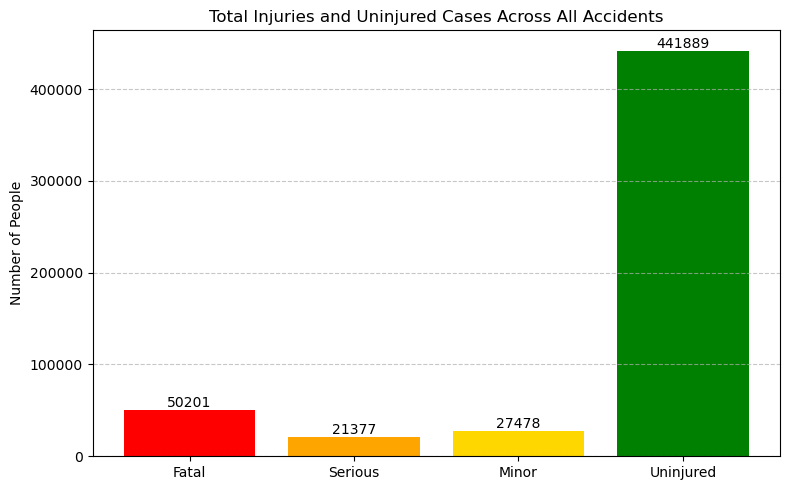

In [12]:
import matplotlib.pyplot as plt

fatal_total = df_clean['Total.Fatal.Injuries'].sum()
serious_total = df_clean['Total.Serious.Injuries'].sum()
minor_total = df_clean['Total.Minor.Injuries'].sum()
uninjured_total = df_clean['Total.Uninjured'].sum()

# Injury types and values
labels = ['Fatal', 'Serious', 'Minor', 'Uninjured']
values = [fatal_total, serious_total, minor_total, uninjured_total]

# Plotting
plt.figure(figsize=(8, 5))
bars = plt.bar(labels, values, color=['red', 'orange', 'gold', 'green'])

# Add value labels on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 100, int(yval), ha='center', va='bottom')

plt.title('Total Injuries and Uninjured Cases Across All Accidents')
plt.ylabel('Number of People')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()




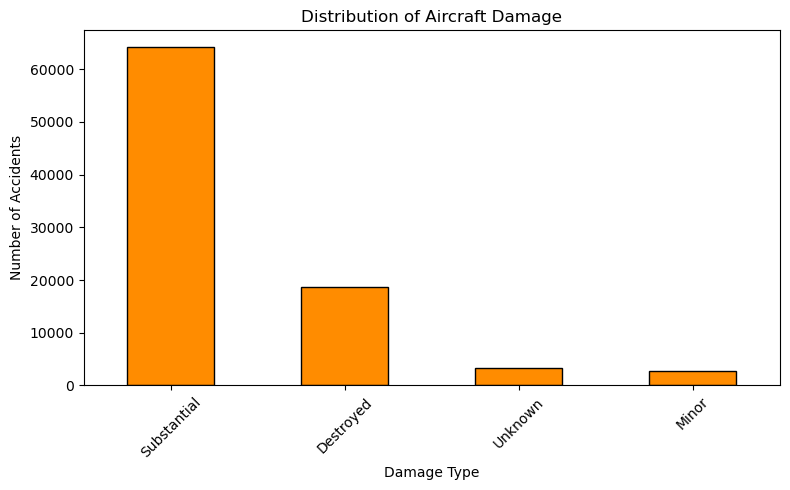

In [13]:
# Bar Chart for Aircraft Damage

plt.figure(figsize=(8, 5))
df_clean['Aircraft.damage'].value_counts().plot(kind='bar', color='darkorange', edgecolor='black')
plt.title('Distribution of Aircraft Damage')
plt.xlabel('Damage Type')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


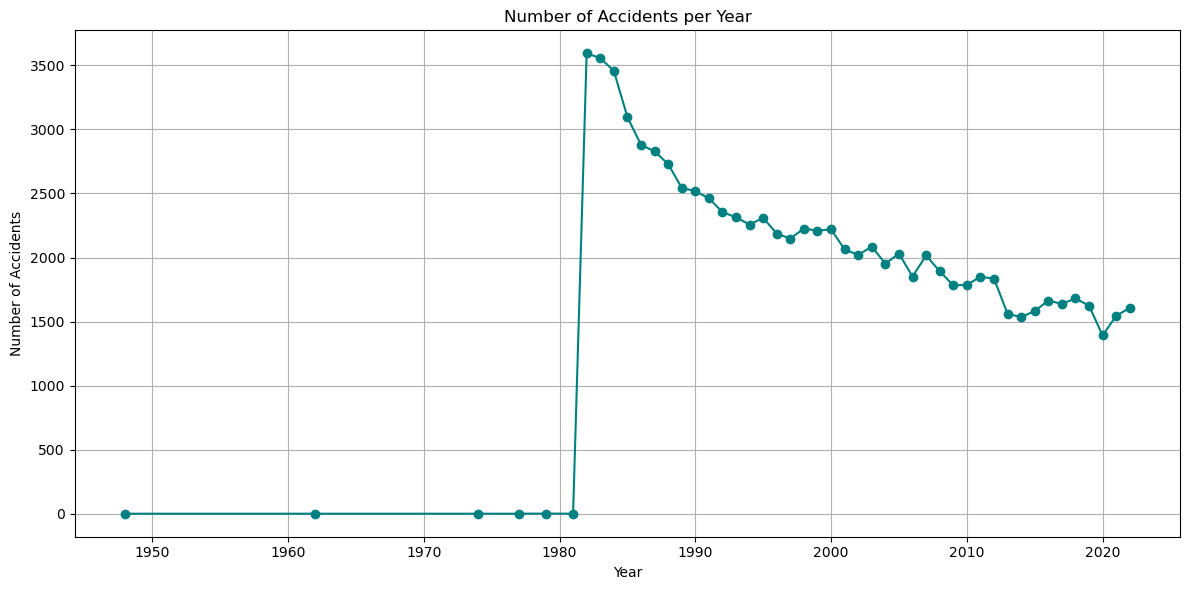

In [14]:
# Number of accidents per year
# Extract year
df_clean.loc[:,'Year'] = df_clean['Event.Date'].dt.year
 
# Count accidents per year
accidents_per_year = df_clean['Year'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(accidents_per_year.index, accidents_per_year.values, marker='o', linestyle='-', color='teal')
plt.title('Number of Accidents per Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.grid(True)
plt.tight_layout()
plt.show()


## 2. Aircraft Models vs Injury Severity

We now relate **aircraft types (Make/Model)** to injury outcomes. This reveals:
- Which aircraft models are most commonly involved in high-severity accidents.
- Which models are associated with fewer fatalities.

**Bar plots and scatter plots** will be used to show relationships between:
- Aircraft Model and Fatal/Serious/Minor Injuries
- Aircraft Make and Injury Distribution

---

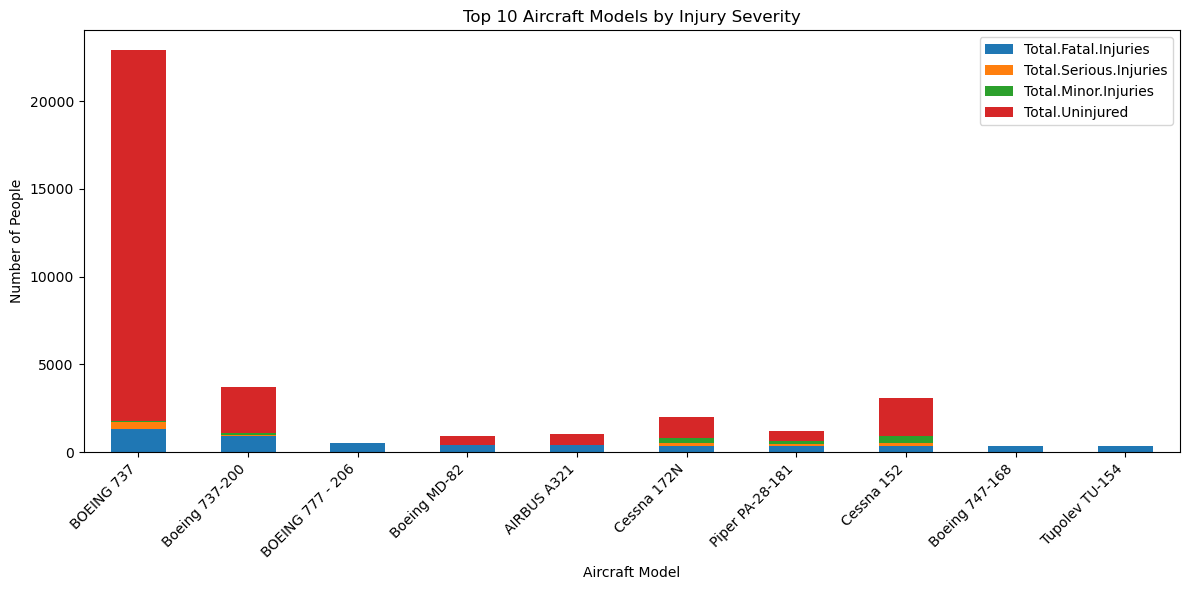

In [15]:
# Group by Aircraft name and sum injury columns
model_injuries = df_clean.groupby('Aircraft.Name')[['Total.Fatal.Injuries', 
                                      'Total.Serious.Injuries', 
                                      'Total.Minor.Injuries', 
                                      'Total.Uninjured']].sum().sort_values('Total.Fatal.Injuries', ascending=False).head(10)

# Bar chart: Top 10 Aircraft Models by Injuries
model_injuries.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Top 10 Aircraft Models by Injury Severity')
plt.xlabel('Aircraft Model')
plt.ylabel('Number of People')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

model_make_mapping = df_clean[['Model', 'Make']].set_index('Model').to_dict()['Make']



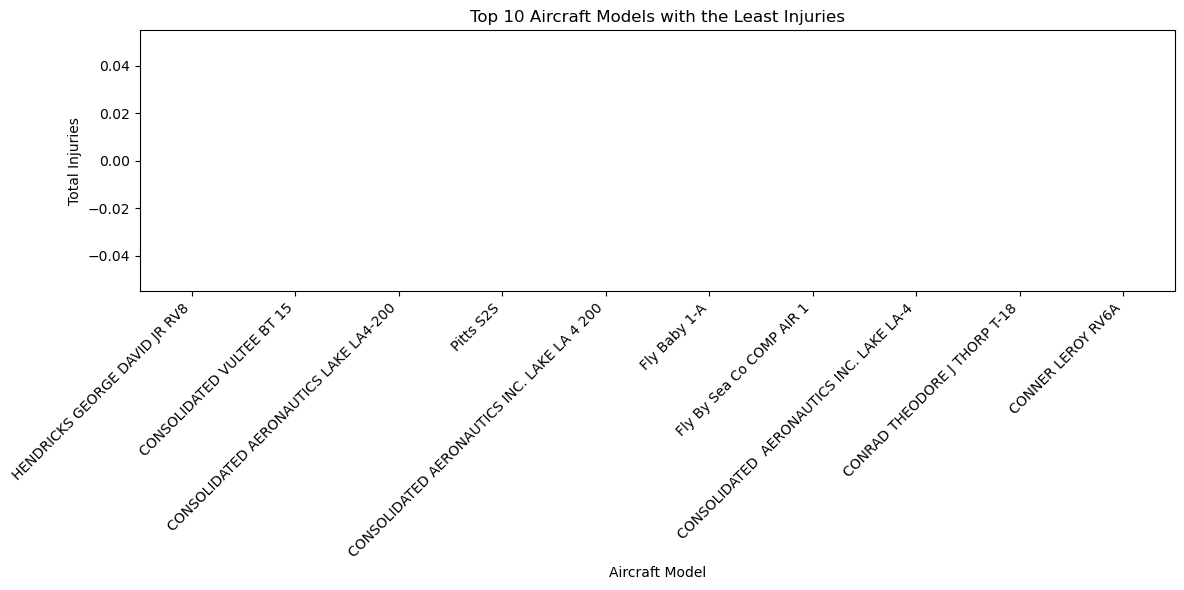

In [16]:
# Create a new column: Total Injuries
df_clean.loc[:,'Total.Injuries'] = df_clean[['Total.Fatal.Injuries', 
                           'Total.Serious.Injuries', 
                           'Total.Minor.Injuries']].sum(axis=1)

# Group by Model and sum total injuries
model_total_injuries = df_clean.groupby('Aircraft.Name')['Total.Injuries'].sum().sort_values()

# Get 10 models with least total injuries
safest_models = model_total_injuries.head(10)

# Plot bar chart
plt.figure(figsize=(12, 6))
safest_models.plot(kind='bar', color='green')
plt.title('Top 10 Aircraft Models with the Least Injuries')
plt.xlabel('Aircraft Model')
plt.ylabel('Total Injuries')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()




# 3. Aircraft Models vs Damage Severity

Here, I analyze how different aircraft **models respond to accidents in terms of damage**. This helps assess structural integrity and design resilience.

We will compare:
- Aircraft Model vs Damage Type (Minor, Substantial, Destroyed)
- Injury severity across aircraft damage categories

**Stacked bar charts** and **grouped visualizations** will be used to highlight the most resilient models.

---

In [17]:
# Grouping data: counting number of accidents by Model and Damage
model_damage = df_clean.groupby(['Aircraft.Name', 'Aircraft.damage']).size().unstack(fill_value=0)
model_damage.head()

Aircraft.damage,Destroyed,Minor,Substantial,Unknown
Aircraft.Name,,,,
107.5 Flying Corporation One Design DR 107,1,0,0,0
1200 G103,0,0,1,0
177MF LLC PITTS MODEL 12,0,0,1,0
1977 Colfer-chan STEEN SKYBOLT,0,0,1,0
1st Ftr Gp FOCKE-WULF 190,1,0,0,0


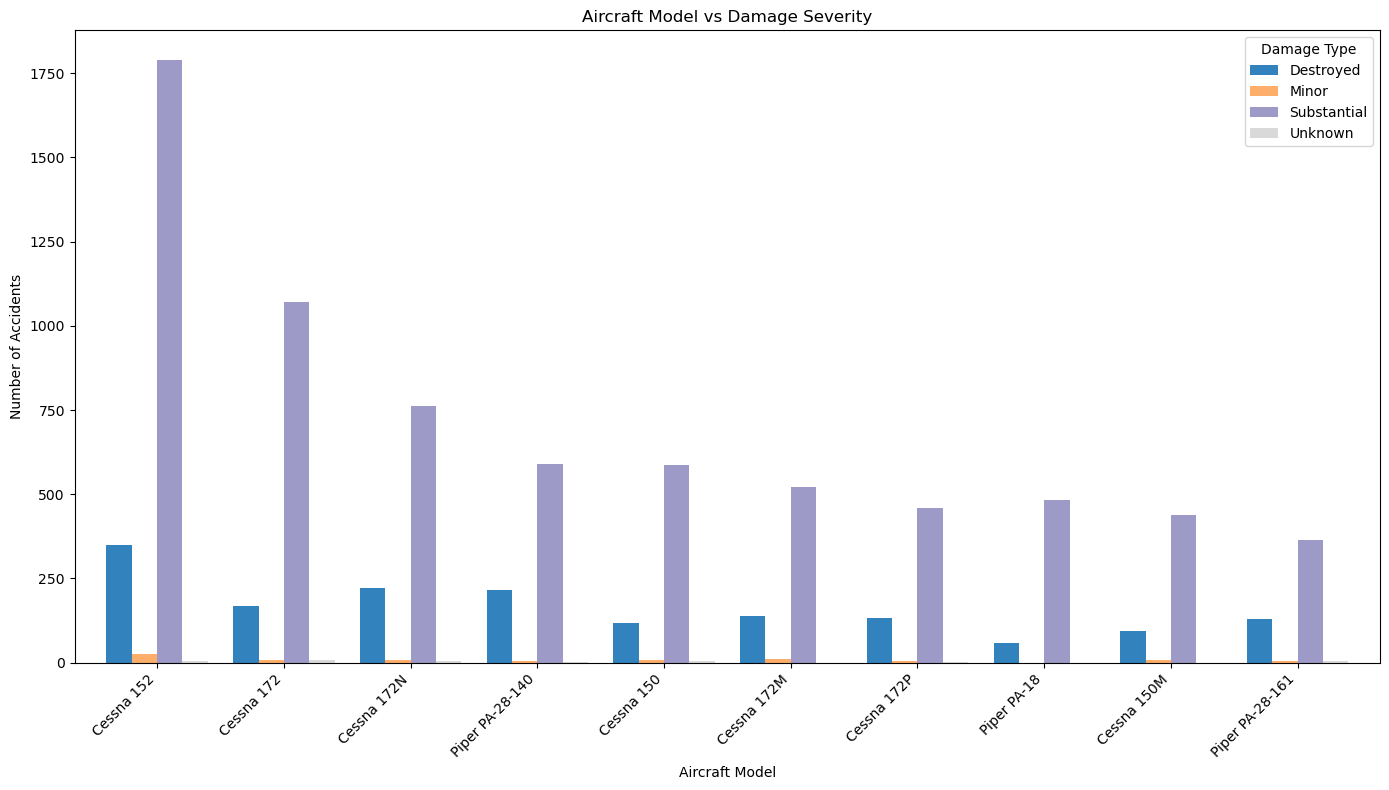

In [18]:
# Choose top 10 models with the most accidents
top_models = model_damage.sum(axis=1).sort_values(ascending=False).head(10)
top_model_damage = model_damage.loc[top_models.index]

# Plotting (Grouped Bar Chart)
top_model_damage.plot(kind='bar', figsize=(14, 8), colormap='tab20c', width=0.8)

# Titles and labels
plt.title('Aircraft Model vs Damage Severity')
plt.xlabel('Aircraft Model')
plt.ylabel('Number of Accidents')
plt.legend(title='Damage Type')
plt.xticks(rotation=45, ha='right')

# Tight layout for better spacing
plt.tight_layout()
plt.show()


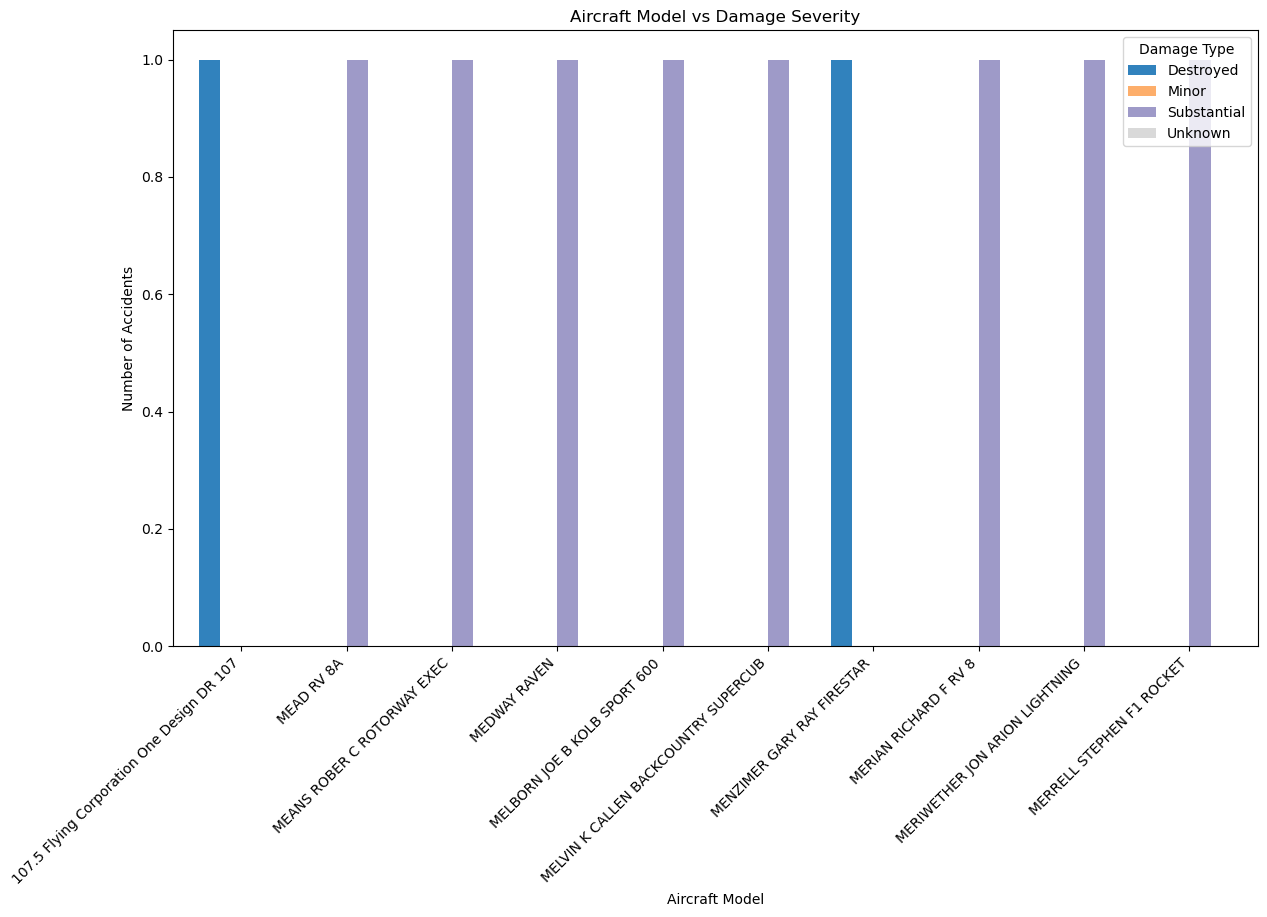

In [22]:
# Choose top 10 models with the least accidents
top_models = model_damage.sum(axis=1).sort_values(ascending=True).head(10)
top_model_damage = model_damage.loc[top_models.index]

# Plotting (Grouped Bar Chart)
top_model_damage.plot(kind='bar', figsize=(14, 8), colormap='tab20c', width=0.8)

# Titles and labels
plt.title('Aircraft Model vs Damage Severity')
plt.xlabel('Aircraft Model')
plt.ylabel('Number of Accidents')
plt.legend(title='Damage Type')
plt.xticks(rotation=45, ha='right')
plt.show()
# Tigh

## 4. Accident and Injury Trends Over Time

I will examine how the number of accidents and the severity of injuries have evolved year after year.  
This will help understand if safety has improved over time and whether certain aircraft generations are riskier.

Visualizations:
- Line plot of total accidents per year  
- Line plot of total fatal injuries per year  
- Line plot of total serious injuries per year  
- Line plot of total minor injuries per year



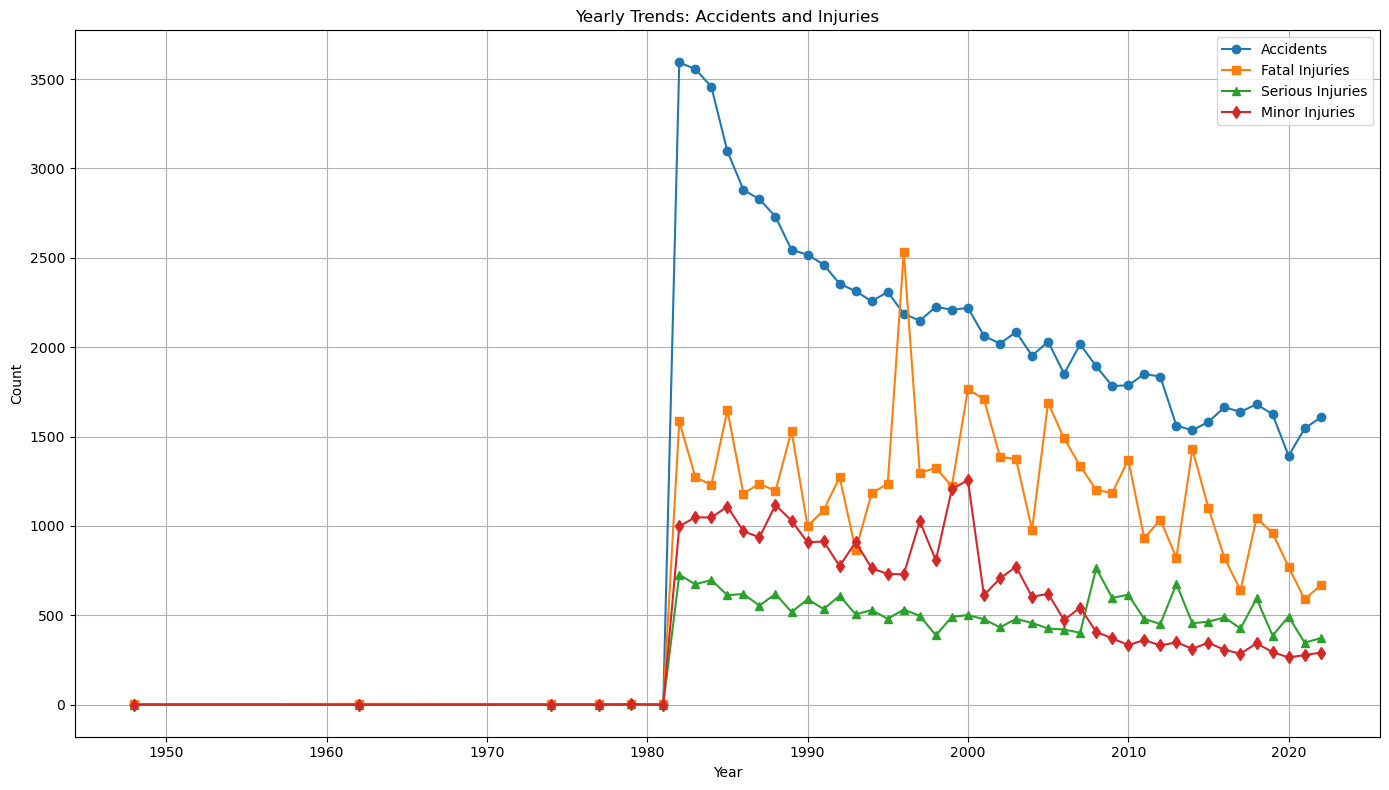

In [20]:
df_clean['Year'] = df_clean['Event.Date'].dt.year

# Aggregate counts per year
accidents_per_year = df_clean.groupby('Year')['Event.Id'].count()
fatal_per_year     = df_clean.groupby('Year')['Total.Fatal.Injuries'].sum()
serious_per_year   = df_clean.groupby('Year')['Total.Serious.Injuries'].sum()
minor_per_year     = df_clean.groupby('Year')['Total.Minor.Injuries'].sum()

# Plot all four series on one figure
plt.figure(figsize=(14, 8))
plt.plot(accidents_per_year.index, accidents_per_year.values, marker='o', label='Accidents')
plt.plot(fatal_per_year.index,     fatal_per_year.values,     marker='s', label='Fatal Injuries')
plt.plot(serious_per_year.index,   serious_per_year.values,   marker='^', label='Serious Injuries')
plt.plot(minor_per_year.index,     minor_per_year.values,     marker='d', label='Minor Injuries')

plt.title('Yearly Trends: Accidents and Injuries')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# 5. insight to the business according to the analysis

 - first do a summary of the aircraft
 - provide insight and recommendations

        

In [21]:
#  Ensure Total.Injuries is calculated
df_clean.loc[:, 'Total.Injuries'] = (
    df_clean[['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries']]
    .sum(axis=1)
)

#  Aggregate statistics per aircraft
model_stats = (
    df_clean
    .groupby('Aircraft.Name')
    .agg(Incident_Count=('Event.Id', 'count'),
         Total_Injuries=('Total.Injuries', 'sum'))
)
model_stats['Avg_Injuries'] = model_stats['Total_Injuries'] / model_stats['Incident_Count']

#  Select examples
safest = model_stats.sort_values('Total_Injuries').head(5)
riskiest = model_stats.sort_values('Total_Injuries', ascending=False).head(5)

#  Display results
print("Top 5 Safest Aircraft Models ")
print(safest)

print("\n Top 5 Riskiest Aircraft Models ")
print(riskiest)


Top 5 Safest Aircraft Models 
                                             Incident_Count  Total_Injuries  \
Aircraft.Name                                                                 
HENDRICKS GEORGE DAVID JR RV8                             1             0.0   
CONSOLIDATED VULTEE BT 15                                 1             0.0   
CONSOLIDATED AERONAUTICS LAKE LA4-200                     1             0.0   
Pitts S2S                                                 1             0.0   
CONSOLIDATED AERONAUTICS INC. LAKE LA 4 200               1             0.0   

                                             Avg_Injuries  
Aircraft.Name                                              
HENDRICKS GEORGE DAVID JR RV8                         0.0  
CONSOLIDATED VULTEE BT 15                             0.0  
CONSOLIDATED AERONAUTICS LAKE LA4-200                 0.0  
Pitts S2S                                             0.0  
CONSOLIDATED AERONAUTICS INC. LAKE LA 4 200           0.

---
# Aircraft Safety and Business Setup Insights

## Top 5 Safest Aircraft Models
Based on the analysis, the safest aircraft models are those with zero recorded injuries in the dataset, indicating minimal accidents or none that resulted in injury. Here are the top 5 safest aircraft models:

### HENDRICKS GEORGE DAVID JR RV8

 - Incident Count: 1

 - Total Injuries: 0.0

 - Average Injuries: 0.0

### CONSOLIDATED VULTEE BT 15

 - Incident Count: 1

 - Total Injuries: 0.0

 - Average Injuries: 0.0

### CONSOLIDATED AERONAUTICS LAKE LA4-200

 - Incident Count: 1

 - Total Injuries: 0.0

 - Average Injuries: 0.0

### Pitts S2S

 - Incident Count: 1

 - Total Injuries: 0.0

 - Average Injuries: 0.0

### CONSOLIDATED AERONAUTICS INC. LAKE LA 4 200

 - Incident Count: 1

 - Total Injuries: 0.0

 - Average Injuries: 0.0

## Top 5 Riskiest Aircraft Models
On the other hand, the riskiest aircraft models tend to have higher accident counts and more significant total injuries. These models may require further attention for improving safety measures, particularly where accidents occur more frequently. The top 5 riskiest aircraft models are:

### BOEING 737

 - Incident Count: 435

 - Total Injuries: 1804

 - Average Injuries: 4.15

### Boeing 737-200

 - Incident Count: 53

 - Total Injuries: 1064

 - Average Injuries: 20.08

### Cessna 152

 - Incident Count: 2168

 - Total Injuries: 922

 - Average Injuries: 0.43

### Piper PA-28-140

 - Incident Count: 812

 - Total Injuries: 877

 - Average Injuries: 1.08

### Cessna 172N

 - Incident Count: 996

 - Total Injuries: 835

 - Average Injuries: 0.84

## Weather and Location Considerations for Business Setup
It is crucial to assess the weather conditions and location for potential risks:

## Weather Conditions:

### Low Visibility (Fog, Rain, Snow):
 - Aircraft models tend to face more risks during these conditions, especially in lower altitudes or if the aircraft is not designed for such weather. This is true for larger commercial aircraft (e.g., Boeing 737). A business offering flight services might want to focus on weather-resistant aircraft or design services that accommodate such conditions (e.g., instrument training, weather forecasting).

### Clear Weather:
 -  Aircraft such as the Pitts S2S and CONSOLIDATED AERONAUTICS LAKE LA4-200, which have zero injuries, may perform better in clear weather and could be ideal for leisure or training flights. A business that focuses on scenic flights or training could focus on regions with stable, clear weather.

## Location and Regional Safety:

### High Traffic Regions:
 -  Busy regions with more flight traffic, such as major airports or tourist destinations, might result in higher accident numbers. For example, the Cessna 152 and Piper PA-28-140 models are often seen in training environments with high traffic, which increases the risk of accidents. Locations with high air traffic may have stricter regulations and greater oversight, offering an opportunity for safety-focused businesses like flight schools, safety equipment suppliers, or insurance services.

### Remote or Low Traffic Areas:
 -  In rural or low-traffic areas, aircraft may face less congestion, potentially reducing the risk of accidents. Here, aircraft like the HENDRICKS GEORGE DAVID JR RV8 might be ideal for private use or small businesses. In these locations, a business might focus on smaller aircraft services, like aerial photography, agriculture, or specialized transport.

## Recommended Business Locations Based on Aircraft Safety and Weather Conditions:
 - Coastal Regions with clear weather and lower traffic might be ideal for sightseeing and training businesses. Aircraft like the Pitts S2S are particularly suited for such services.

 - Mountainous or Remote Regions could be the perfect place to offer private or small aircraft operations with aircraft that have proven to be safe, like the CONSOLIDATED AERONAUTICS LAKE LA4-200, which can handle remote terrain.

 - High Traffic Urban Areas may benefit from safety training or maintenance services, particularly for aircraft with higher accident rates like the Boeing 737. Such regions will have more stringent safety regulations, creating a market for compliance-focused services.

By combining the aircraft model data with the weather conditions and geographic trends, you can strategically place your business in an area that maximizes safety and minimizes operational risk, ensuring smoother operations and greater success.







